## Analysing and Solving the Kaggle Titanic Dataset

In [1]:
# Get the Data and see the dataset

import os
path=os.getcwd()
print(path)

c:\Public\ML\StrangerThings\Kaggle_Titanic


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
filepath=[]
for file in os.listdir(path):
    if 'csv' in file:filepath.append(path+"\\"+file)
print(filepath)        

['c:\\Public\\ML\\StrangerThings\\Kaggle_Titanic\\test.csv', 'c:\\Public\\ML\\StrangerThings\\Kaggle_Titanic\\train.csv']


In [5]:
for path in filepath:
    if "train" in path:
        df_train=pd.read_csv(path)

In [9]:
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
(df_train.size, df_train.shape)

(10692, (891, 12))

### Ideas To Start with 
+ Check what features are useful and make sense to predict survived or not
+ Break down into Sex and Pclass, and age that might give a basic idea of the dataset patterns
    + After breaking down the data, lets clean it based on NaN's present
    + As we take out some of the data counts, we see Age and Embarked probably have "NaN"s .
    + Just using the features, Pclass, Sex , they do not have any NaNs.
+ Considering the Whole Dataset
    + Take Pred = Survived = [0,1]
    + Use Features as "Pclass" and "Sex" and predict and check the accuracy, we will go from there
    + Use just these two fetures, break into training and validation set
    + Test the training and validation accuracy
    + Start adding more features and see how that makes the prediction accuracy better
+ Get a Basic Logistic Regression as a step-1 to predict the test set accuracy 

In [47]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [53]:
import numpy as np
df_train_filt1=df_train[['PassengerId','Survived','Pclass','Sex','Age','Embarked']]
print("Total records = ", df_train_filt1.shape[0])
print("How many survivied as below", "\n", df_train_filt1[df_train_filt1['Survived']==1].count())
print("How many persished as below", "\n", df_train_filt1[df_train_filt1['Survived']==0].count())

# As a whole population Check how many survived and perished
p=figure(x_range=["Total Passengers", "Survived", "Perished"], plot_height=500, title="Total Survival guide")
p.vbar(x=["Total Passengers", "Survived", "Perished"], top=[df_train_filt1.shape[0], \
                                                           df_train_filt1[df_train_filt1['Survived']==1].shape[0], 
                                                           df_train_filt1[df_train_filt1['Survived']==0].shape[0]], width=0.7)

#set some properties to make the plot look better
p.xgrid.grid_line_color="Blue"
p.y_range.start=0.0

show(p)

Total records =  891
How many survivied as below 
 PassengerId    342
Survived       342
Pclass         342
Sex            342
Age            290
Embarked       340
dtype: int64
How many persished as below 
 PassengerId    549
Survived       549
Pclass         549
Sex            549
Age            424
Embarked       549
dtype: int64


In [46]:
s_male_count=df_train_filt1[df_train_filt1["Survived"]==1][df_train_filt1["Sex"]=='male'].shape[0]
s_female_count=df_train_filt1[df_train_filt1['Survived']==1][df_train_filt1['Sex']=='female'].shape[0]
p_male_count=df_train_filt1[df_train_filt1['Survived']==0][df_train_filt1['Sex']=='male'].shape[0]
p_female_count=df_train_filt1[df_train_filt1['Survived']==0][df_train_filt1['Sex']=='female'].shape[0]


x_range_= [val1+"_"+val2 for val2 in list(df_train_filt1['Sex'].unique()) for val1 in ['Survived', 'Perished']]
p=figure(x_range=x_range_, plot_height=300, title="Survival among Sex")
p.vbar(x=x_range_, top=[s_male_count,p_male_count,s_female_count,p_female_count], width=0.7)

# Set some properties to make the plot look better
p.xgrid.grid_line_color=None
p.y_range.start=0.0

show(p)

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


### Insights and Making sense of the data
+ The above curve suggests that there are a large % of men who perished and quite a few % of women who survived, This does not build any relation but still, let's analyze it further with "Age" and "Pclass" into the picture here
+ For males who perished, most of the Age range lies between 20-45, let's get a visual Bar graph for that
+ For females who perished, most of the Age range lies between 20-40.
+ https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


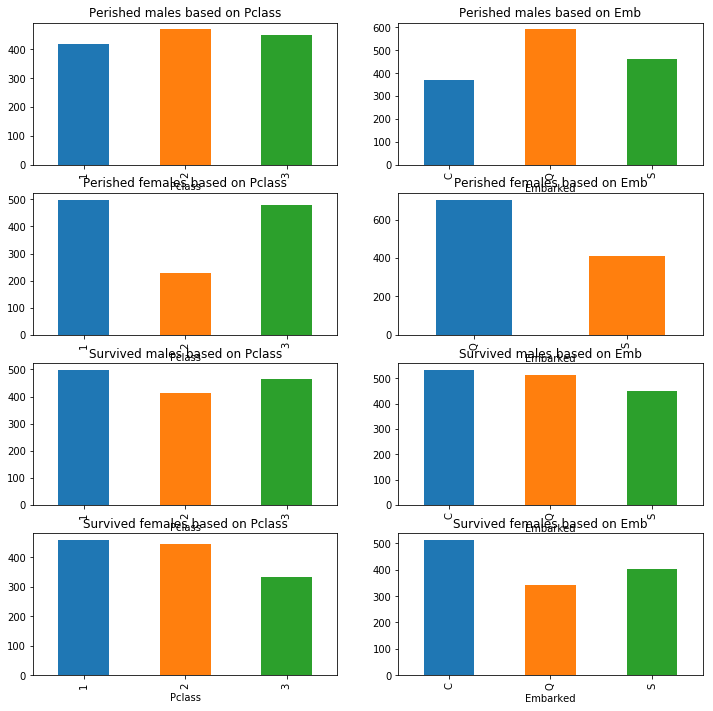

In [111]:
from bokeh.models import HoverTool, BoxSelectTool

hover = HoverTool(
                    tooltips=[
                        ("index", "$index"),
                        ("(x,y)","($x, $y)")
                    ])
#TOOLS=[HoverTool()]
p1=figure(plot_width=1000, plot_height=800, title="Perished Vs Survived Male with Age", tools=[hover])


s_male_age_df = df_train_filt1[df_train_filt1["Survived"]==1][df_train_filt1["Sex"]=='male'].dropna()
p_male_age_df = df_train_filt1[df_train_filt1["Survived"]==0][df_train_filt1["Sex"]=='male'].dropna()
s_female_age_df = df_train_filt1[df_train_filt1["Survived"]==1][df_train_filt1["Sex"]=='female'].dropna()
p_female_age_df = df_train_filt1[df_train_filt1["Survived"]==0][df_train_filt1["Sex"]=='female'].dropna()


# Get Number of Perished male and females age rangses
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
p_male_age_df[(p_male_age_df.Age>=20)&(p_male_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[0,0], title="Perished males based on Pclass")
p_male_age_df[(p_male_age_df.Age>=20)&(p_male_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[0,1], title="Perished males based on Emb")
p_female_age_df[(p_female_age_df.Age>=20)&(p_female_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[1,0], title="Perished females based on Pclass")
p_female_age_df[(p_female_age_df.Age>=20)&(p_female_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[1,1], title="Perished females based on Emb")

# Get Number of Survived males and females age ranges
s_male_age_df[(s_male_age_df.Age>=20)&(s_male_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[2,0], title="Survived males based on Pclass")
s_male_age_df[(s_male_age_df.Age>=20)&(s_male_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[2,1], title="Survived males based on Emb")
s_female_age_df[(s_female_age_df.Age>=20)&(s_female_age_df.Age<=40)].groupby('Pclass')['PassengerId'].mean().plot(kind='bar',ax=ax[3,0], title="Survived females based on Pclass")
s_female_age_df[(s_female_age_df.Age>=20)&(s_female_age_df.Age<=40)].groupby('Embarked')['PassengerId'].mean().plot(kind='bar',ax=ax[3,1], title="Survived females based on Emb")


p1.line(s_male_age_df['PassengerId'], s_male_age_df['Age'],color='blueviolet',line_width=1)
p1.line(p_male_age_df['PassengerId'], p_male_age_df['Age'],color='red',line_width=1)
show(p1)


#### More Insights 
+ For Male who perished, we see the "Pclass" does not make any difference, but Embarkment sure does.
+ For Female who perished, we see both make a lot of difference, it also seems no one who embarked from "C" perished, which is a significant find

In [83]:
p2=figure(plot_width=1000, plot_height=800, title="Perished Vs Survived FeMale with Age", tools=[hover])
p2.line(s_female_age_df['PassengerId'], s_female_age_df['Age'],color='blueviolet',line_width=1)
p2.line(p_female_age_df['PassengerId'], p_female_age_df['Age'],color='red',line_width=1)
show(p2)

### Prediction
+ Now we break down the Training set into Training and validation sets 
+ Use Logistic regression as the Model to predict, and check the Training and validation accuracy 
+ Use the barebone features, "Sex", "Age", "Embarked", "Pclass" , which is a very small set of feautes and does not use any feauture engineering

In [129]:
# Break into Validation set, drop the survived column and also need to make sure there are no NaN's
df_train.head(10)
df_train_filt2=df_train[['PassengerId','Survived','Pclass','Sex', 'Age','Fare','Embarked']]
df_train_filt2.head(10)
df_train_filt2.count() # There are a lot of Age's that are NA, let's not remove them but fill them up with the mean

Emb_classes=list(df_train['Embarked'].unique())[:3]
ch=np.random.choice([i for i in range(len(Emb_classes))])
df_train_filt2[df_train_filt2['Embarked'].isna()==True].fillna(Emb_classes[ch])

# Now to fill up the NA values for Age
df_train_filt2[df_train_filt2['Age']].isna()==True].fillna()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
Fare           891
Embarked       889
dtype: int64